In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def func1(x, y, b):
    return (x ** 2 + b * y ** 2) / 2

In [3]:
def gradient_func1(x):
    return x

In [4]:
def gradient_func2(y, b):
    return b * y

In [5]:
def gradient_descent(x, y, b, max_iter, tol):
    iterations = 0
    learning_rate = 0.6 
    steps = [(x, y)]

    for _ in range(max_iter):
        iterations += 1
        x_diff = learning_rate * gradient_func1(x)
        y_diff = learning_rate * gradient_func2(y, b)
        
        if np.abs(x_diff) < tol or np.abs(y_diff) < tol:
            break
        
        x -= x_diff
        y -= y_diff
        steps.append((x, y))

    return steps, func1(x, y, b), iterations

In [6]:
def main(b):
    x = np.linspace(-3, 3, 200)
    y = np.linspace(-3, 3, 200)
    X, Y = np.meshgrid(x, y)
    Z = func1(X, Y, b)

    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection='3d')

    path, result, iterations = gradient_descent(-3, -3, 1, 1000, 0.00000001)
    steps_x = [p[0] for p in path]
    steps_y = [p[1] for p in path]
    steps_z = [func1(x, y, b) for x, y in path]

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, cmap='viridis', edgecolor='none')
    ax.plot(steps_x, steps_y, steps_z, 'red', label='Gradient Descent Path')

    text = (f"Learning rate: 0.6\n"
            f"Min. local value: {result:.3f}\n"
            f"No. of iterations: {iterations}\n"
            f"b = {b}")
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    fig = plt.gcf()
    fig.text(0.01, 0.01, text, fontsize=10.5, verticalalignment='bottom', horizontalalignment='left', bbox=props)

    plt.show()


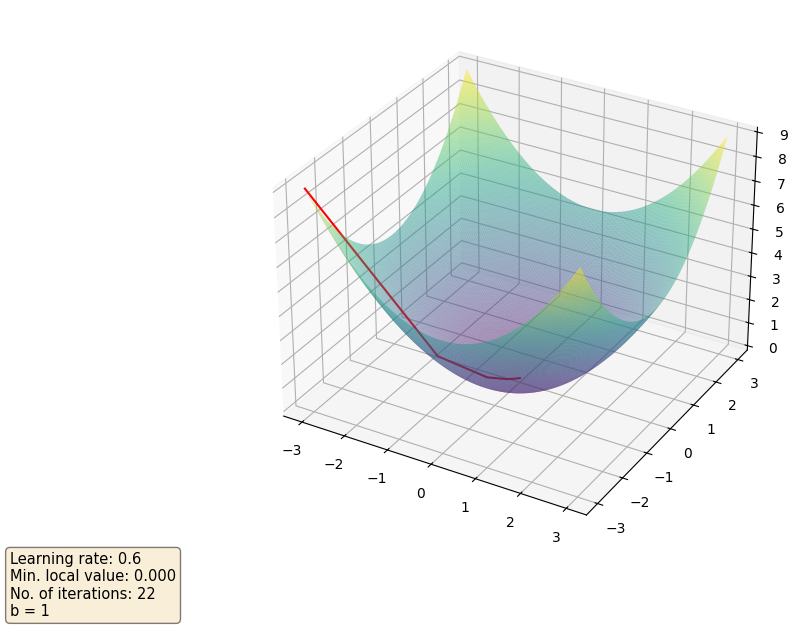

In [7]:
main(1)

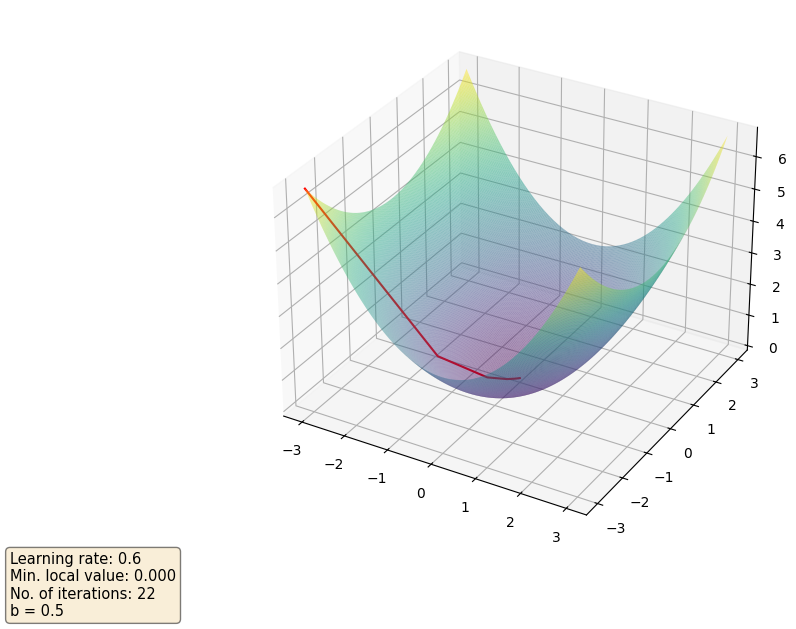

In [8]:
main(1/2)

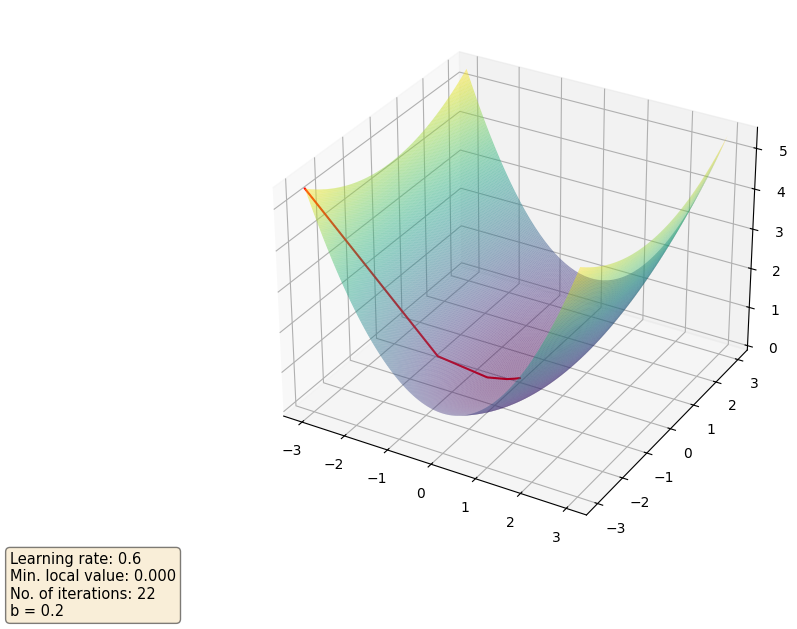

In [9]:
main(1/5)

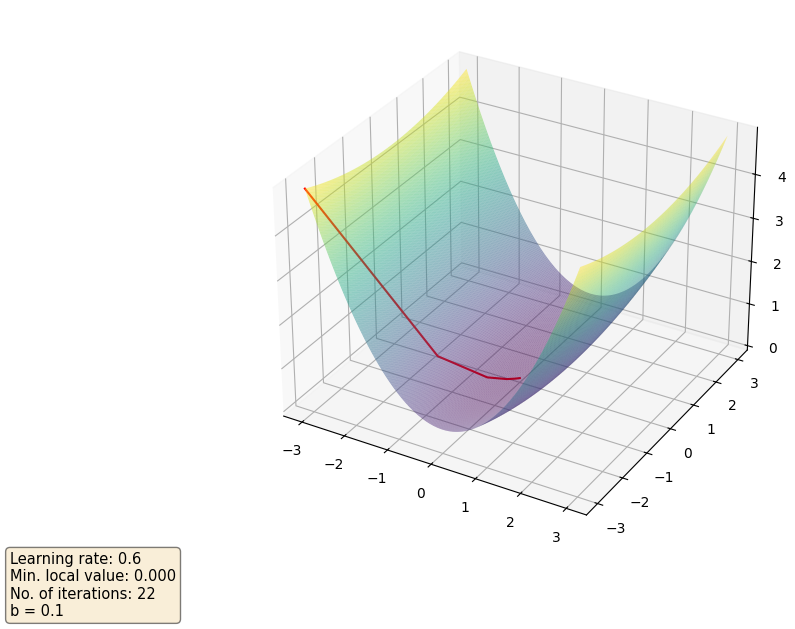

In [10]:
main(1/10)

In [11]:
def optimal_learning_rate(x, y, b):
    if b ** 3 * y ** 3 + x ** 2:
        return (b ** 2 * y ** 2 + x ** 2) / (b ** 3 * y ** 2 + x ** 2)
    else:
        return 0.000000001

In [12]:
def gradient_descent_optimal(x, y, b, max_iter, tol):
    iterations = 0
    steps = [(x, y)]

    for _ in range(max_iter):
        iterations += 1
        learning_rate = optimal_learning_rate(x, y, b)
        x_diff = learning_rate * gradient_func1(x)
        y_diff = learning_rate * gradient_func2(y, b)
        
        if np.abs(x_diff) < tol or np.abs(y_diff) < tol:
            break
        
        x -= x_diff
        y -= y_diff
        steps.append((x, y))

    return steps, func1(x, y, b), iterations

In [13]:
def main_optimal(b):
    x = np.linspace(-3, 3, 200)
    y = np.linspace(-3, 3, 200)
    X, Y = np.meshgrid(x, y)
    Z = func1(X, Y, b)

    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection='3d')

    path, result, iterations = gradient_descent_optimal(-3, -3, 1, 1000, 0.00000001)
    steps_x = [p[0] for p in path]
    steps_y = [p[1] for p in path]
    steps_z = [func1(x, y, b) for x, y in path]

    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, cmap='viridis', edgecolor='none')
    ax.plot(steps_x, steps_y, steps_z, 'red', label='Gradient Descent Path')

    text = (f"Learning rate: optimal\n"
            f"Min. local value: {result:.3f}\n"
            f"No. of iterations: {iterations}\n"
            f"b = {b}")
    
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    fig = plt.gcf()
    fig.text(0.01, 0.01, text, fontsize=10.5, verticalalignment='bottom', horizontalalignment='left', bbox=props)

    plt.show()


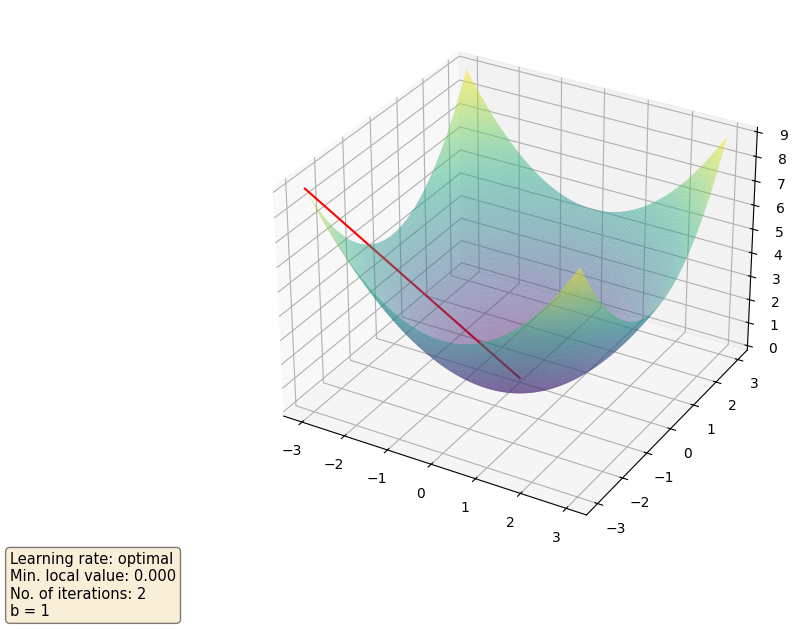

In [14]:
main_optimal(1)

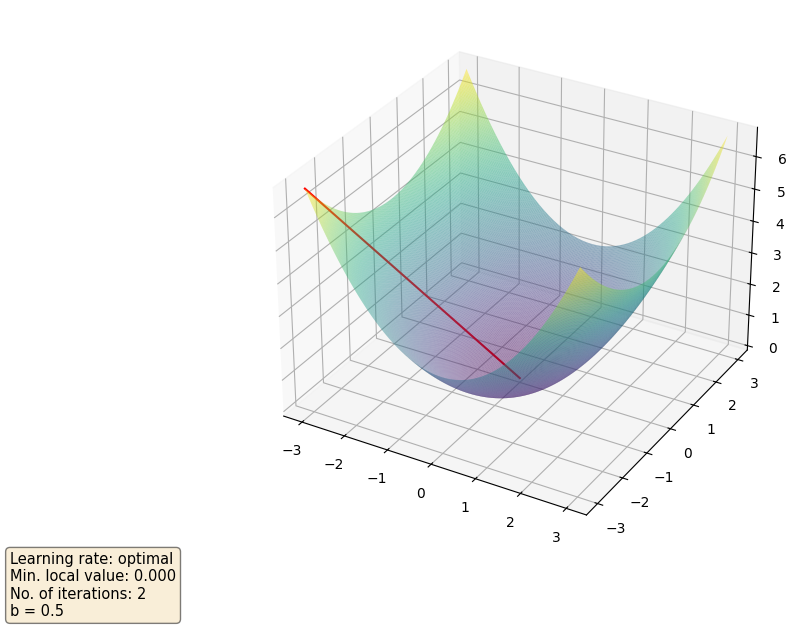

In [15]:
main_optimal(1/2)

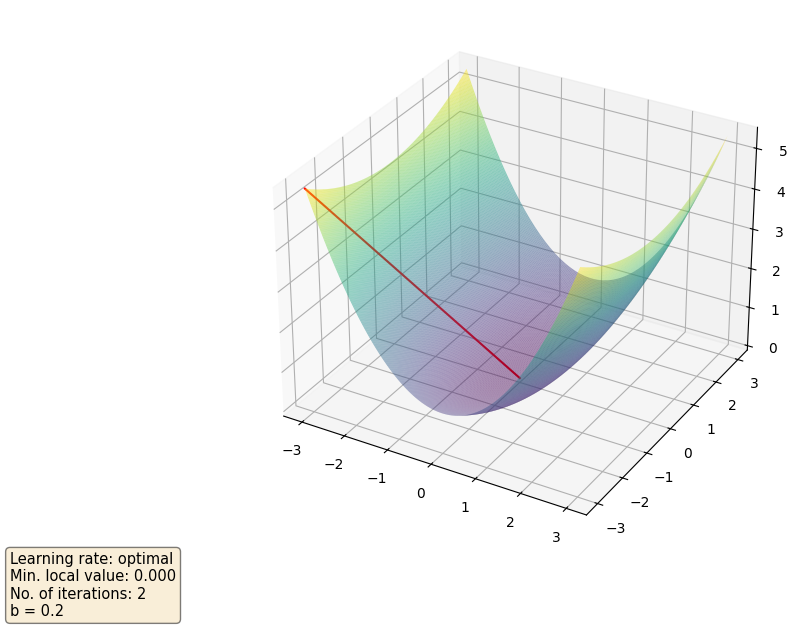

In [16]:
main_optimal(1/5)

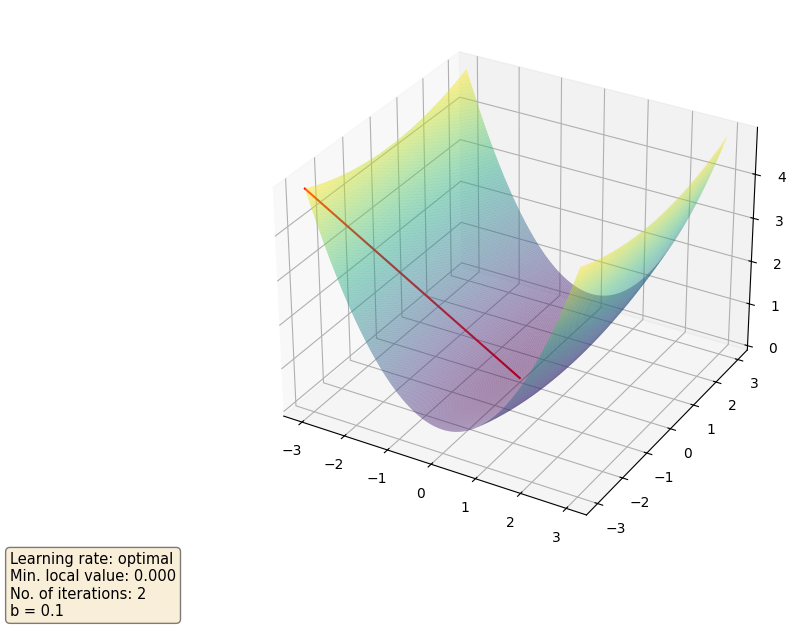

In [17]:
main_optimal(1/10)